## Exploratory Data Analysis

In [1]:
import pandas as pd
df = pd.read_csv('df_enc.csv')

In [2]:
df.head()

,ProdType_enc,Manufacturer_enc,AreaCode_enc,SrcChnl_enc,ProdSize_enc,SrcMonth_enc,SourcingCost
0,2,0,19,3,1,10,10.16
1,1,0,44,0,1,3,134.28
2,2,1,12,0,1,5,12.46
3,2,0,9,3,2,7,107.22
4,1,0,19,0,1,4,197.76


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


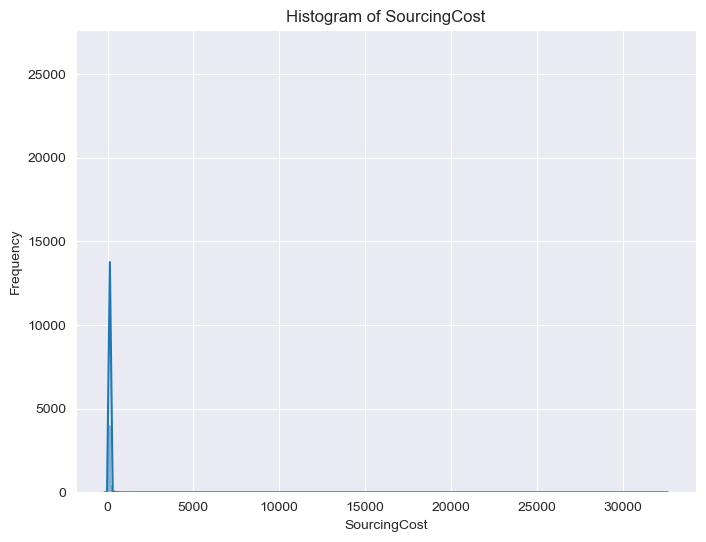

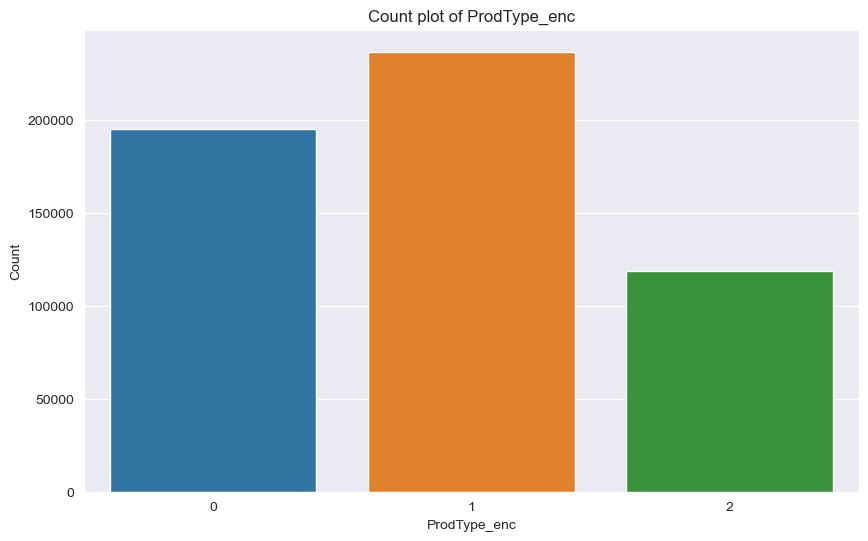

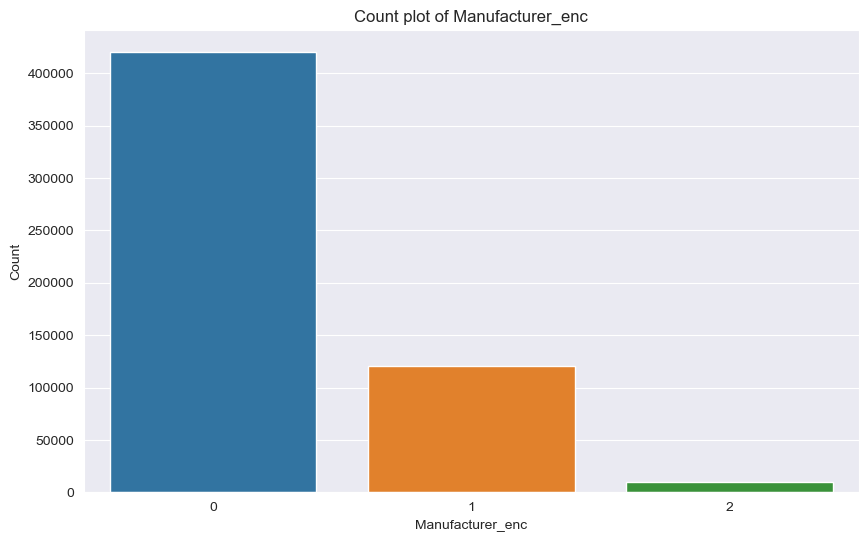

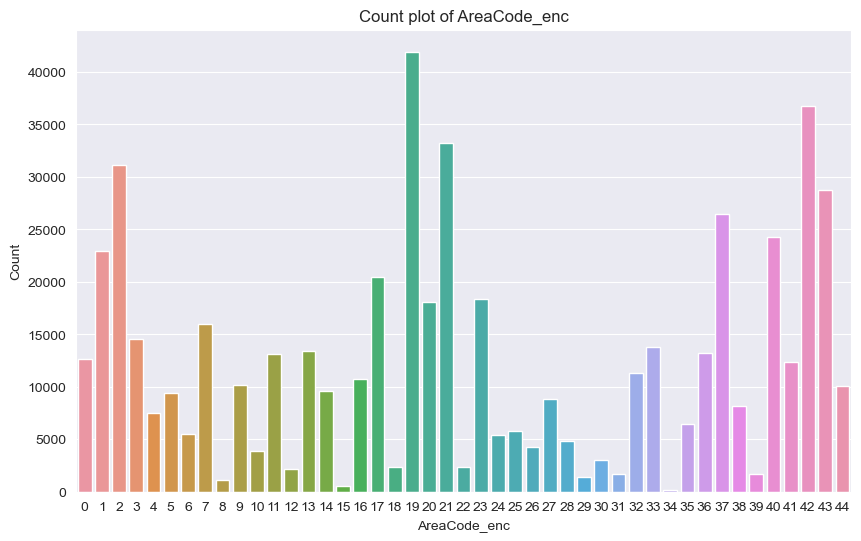

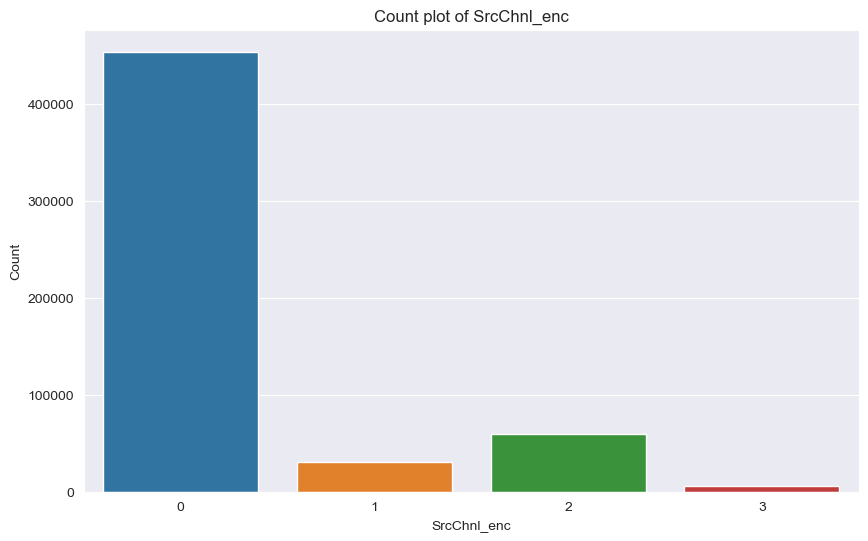

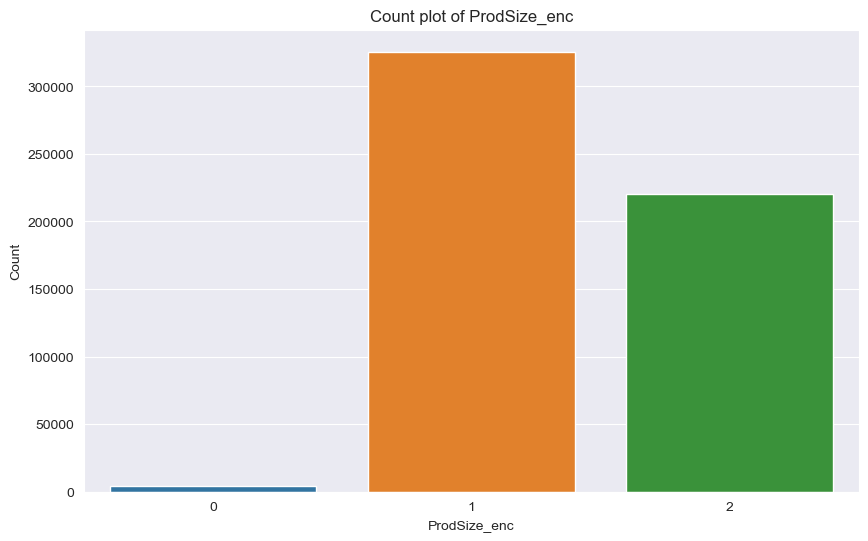

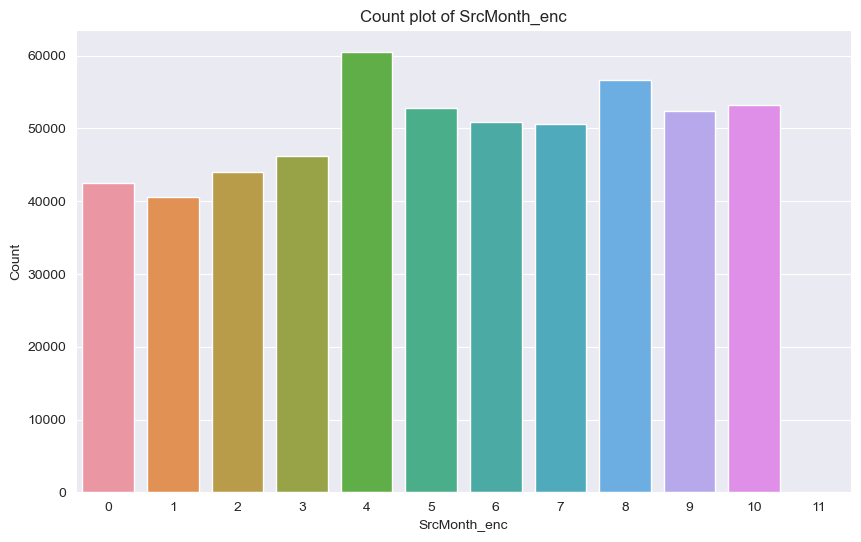

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 1000x800 with 0 Axes>

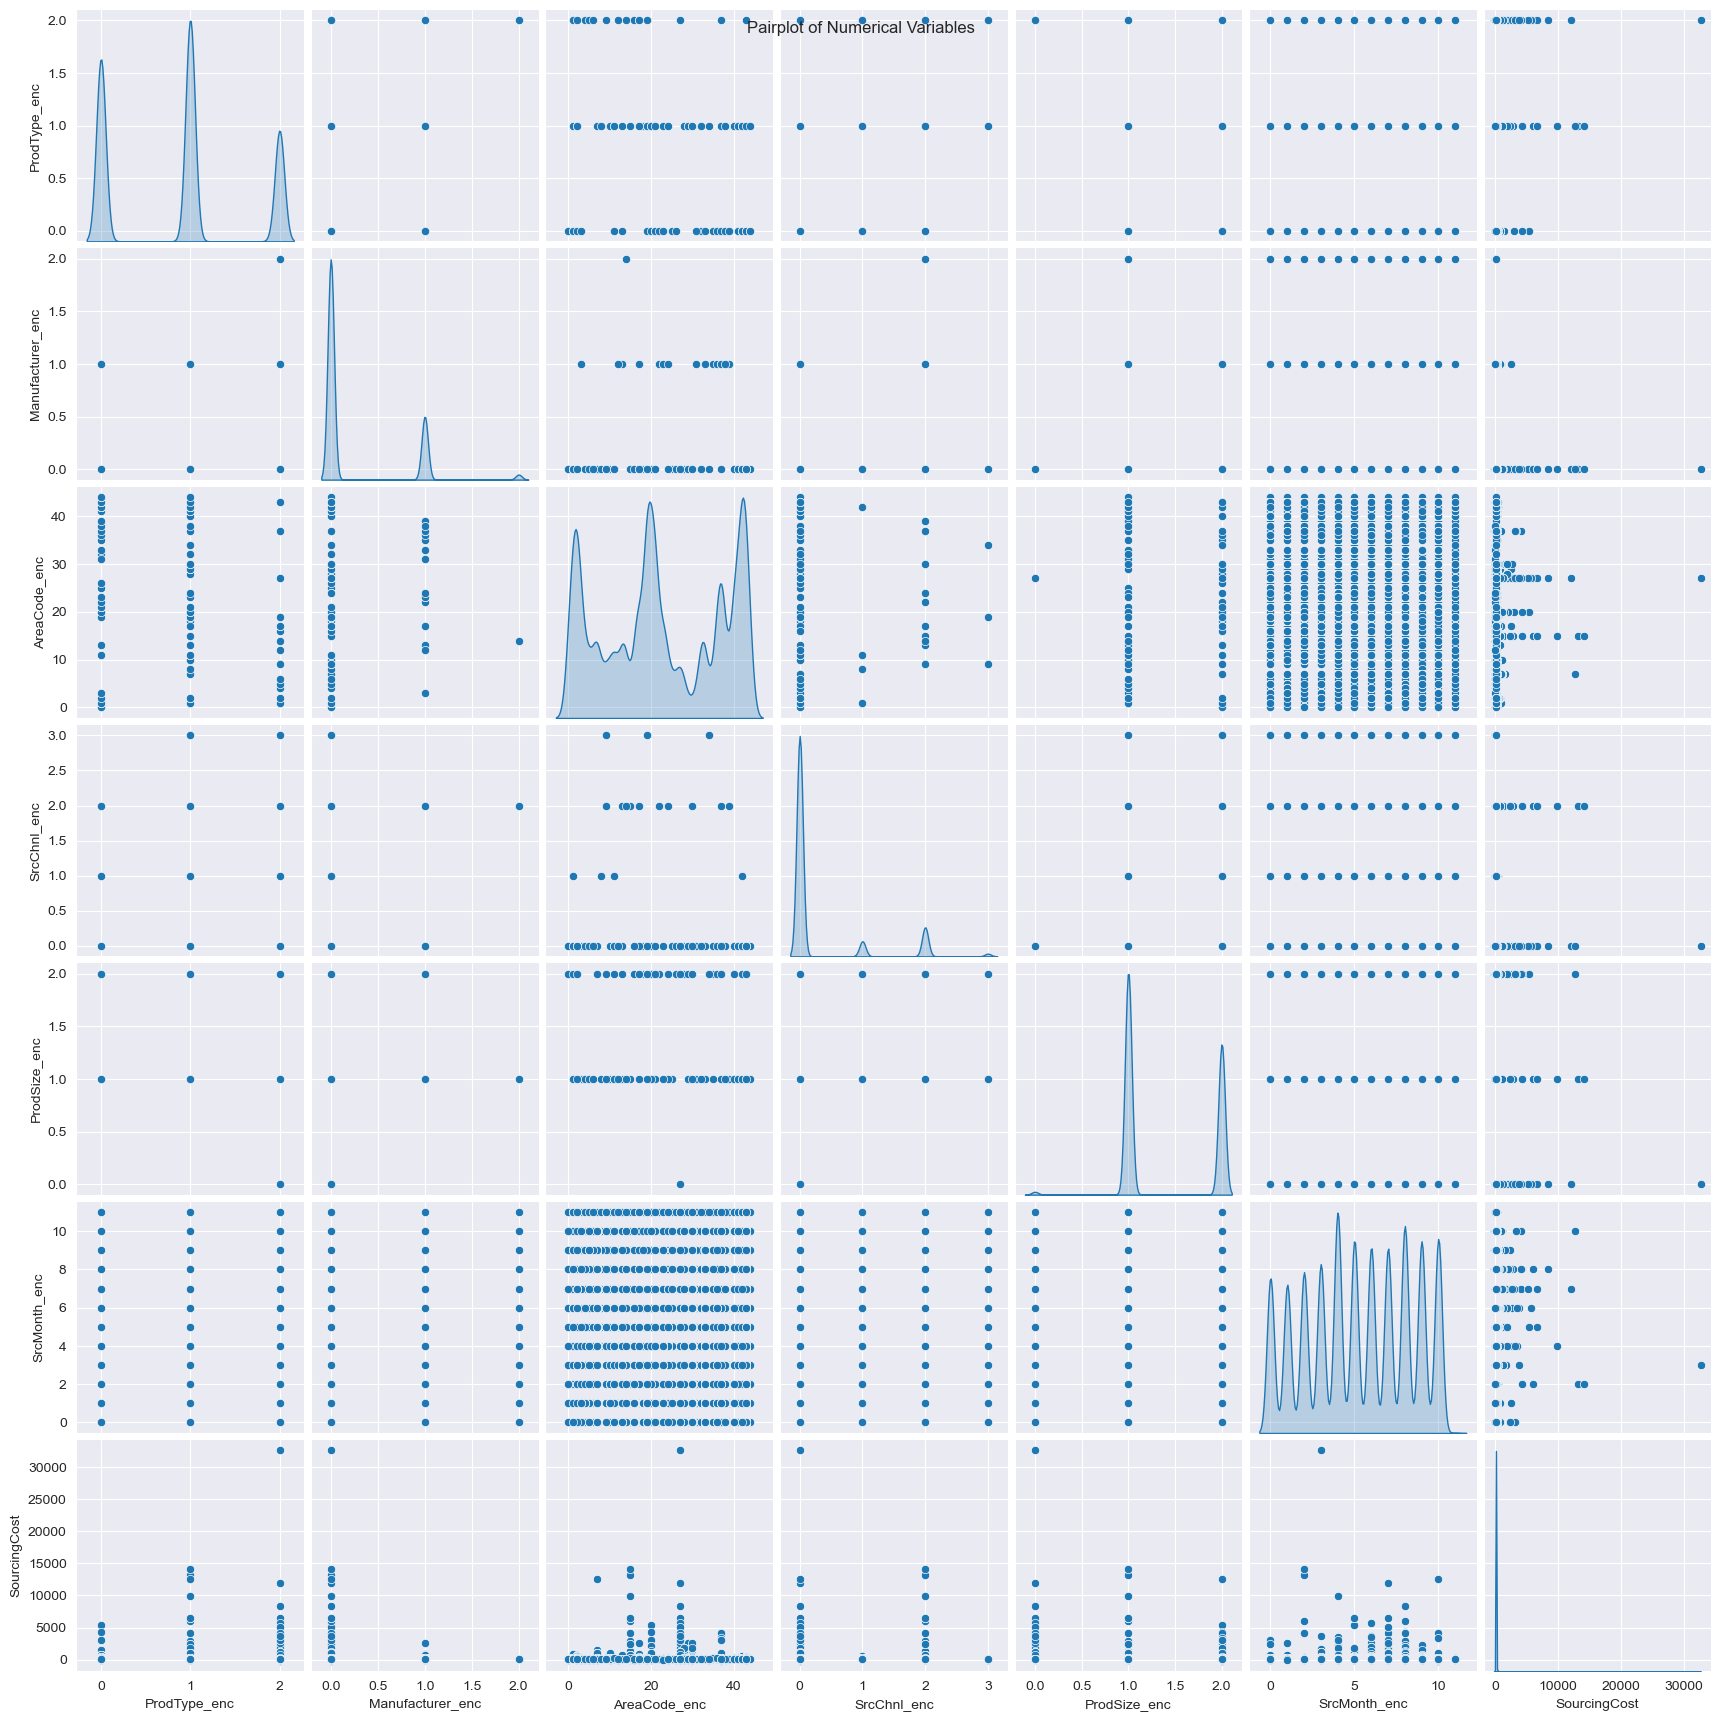

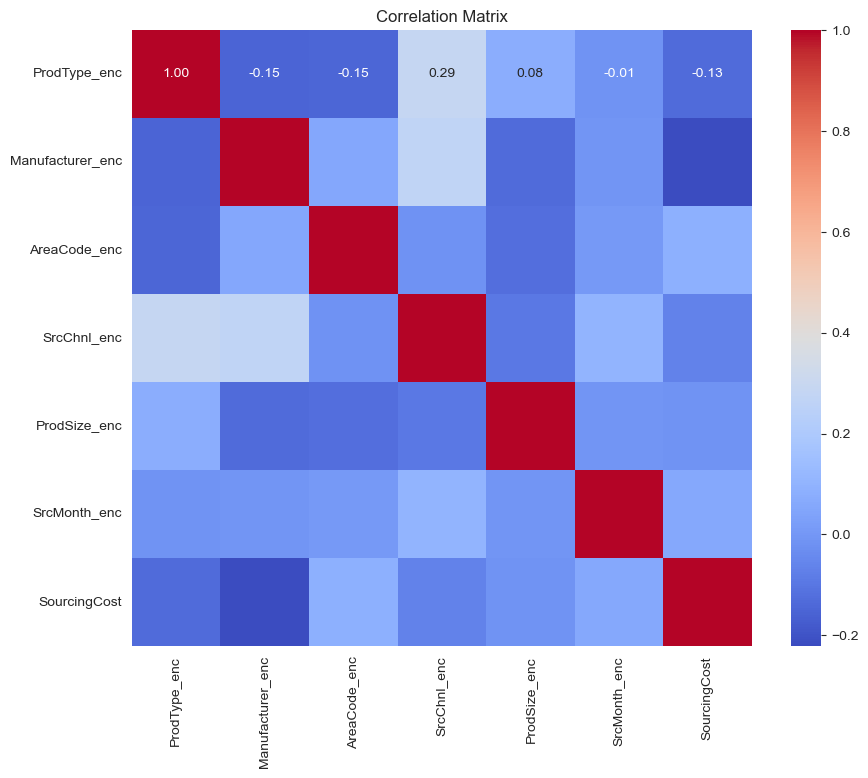

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms or density plots for numerical variables
numerical_columns = ['SourcingCost']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Use bar plots or count plots for categorical variables
categorical_columns = ['ProdType_enc', 'Manufacturer_enc', 'AreaCode_enc', 'SrcChnl_enc', 'ProdSize_enc', 'SrcMonth_enc']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Explore relationships between variables using scatter plots
plt.figure(figsize=(10, 8))
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

# Explore relationships between variables using correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The Data is not continuous and hence my earlier assumption of data being a time series data is false. Hence a sequence to sequence learning model like Recurrent Neural Network cannot be used as the Distribution of data is depended upon the Month Variable which is discrete.

## Change in Approach: Forcast based on Statistical Measures and Probability Distribution instead of Features dependent on continuous variable (time)

In [5]:
import matplotlib.pyplot as plt
monthly_data = df.groupby('SrcMonth_enc').agg({'SourcingCost': ['mean', 'std', 'median']}).reset_index()

### Instead of using and forecasting itself. We must now use descriptors of the data distribution. The Descriptors can be Statistical or Probabilistic 

In [6]:
monthly_data

SrcMonth_enc SourcingCost                     
                        mean         std   median
0             0   101.532779   67.644594  115.240
1             1    99.213042   56.611208  108.300
2             2    95.889838  113.719865  108.100
3             3    98.776522  224.128972  109.580
4             4   107.299802   82.921167  137.670
5             5   112.880565   79.505252  140.900
6             6   112.106085   82.175352  140.830
7             7   119.825242  100.777518  142.610
8             8   120.651969   96.694014  141.580
9             9   111.223734   61.304815  141.220
10           10   110.500465   88.214376  133.660
11           11   106.208021   52.359484  117.245

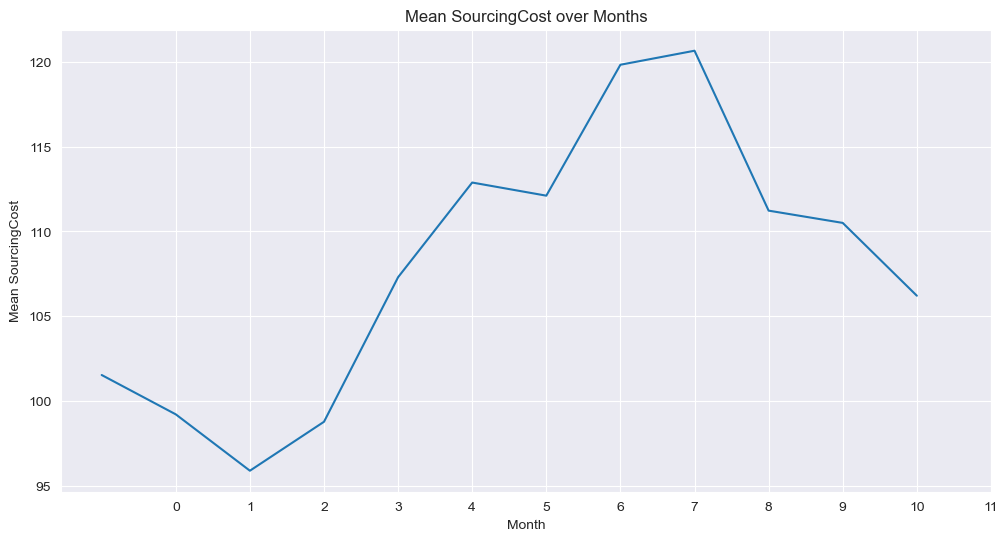

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['SrcMonth_enc'], monthly_data[('SourcingCost', 'mean')])
plt.title('Mean SourcingCost over Months')
plt.xlabel('Month')
plt.ylabel('Mean SourcingCost')
plt.xticks(range(1, 13), monthly_data['SrcMonth_enc'])
plt.grid(True)
plt.show()

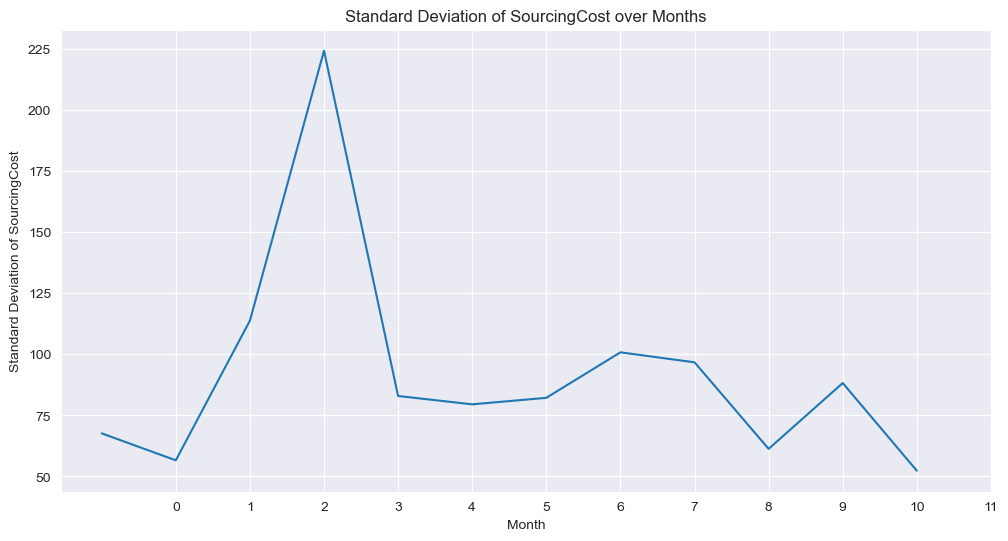

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['SrcMonth_enc'], monthly_data[('SourcingCost', 'std')])
plt.title('Standard Deviation of SourcingCost over Months')
plt.xlabel('Month')
plt.ylabel('Standard Deviation of SourcingCost')
plt.xticks(range(1, 13), monthly_data['SrcMonth_enc'])
plt.grid(True)
plt.show()

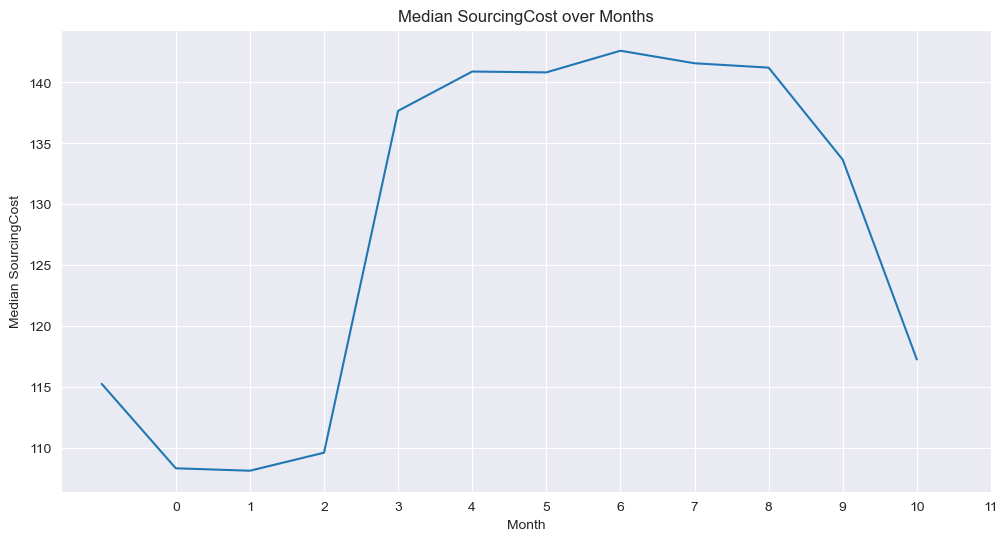

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['SrcMonth_enc'], monthly_data[('SourcingCost', 'median')])
plt.title('Median SourcingCost over Months')
plt.xlabel('Month')
plt.ylabel('Median SourcingCost')
plt.xticks(range(1, 13), monthly_data['SrcMonth_enc'])
plt.grid(True)
plt.show()

### Based on the observation in above trend now lets try training ML models to adapt to this data's distribution and generate similar statistical Descriptors